# Configurations and prerequisites


### Imported Python libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loaded Diwali_Sales_Data.csv file into the Python kernel.

In [2]:
df = pd.read_csv('Diwali_Sales_Data.csv', encoding='unicode_escape')

# Performing Data cleaning

### Removed two blank columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


### Removed null values from the "Amount" column

In [6]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### Converted "Amount" column from string to integer

In [9]:
df['Amount'] = df['Amount'].astype('int')

# Performing EDA

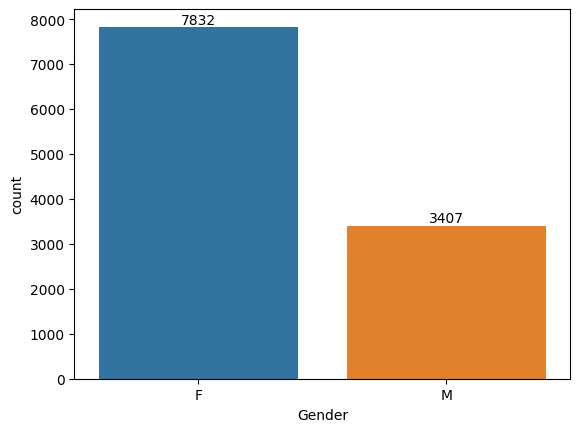

In [10]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

The above graph represents the bifurcation of genders from the dataset. The number of female shoppers are more than male shoppers.

<Axes: xlabel='Gender', ylabel='Amount'>

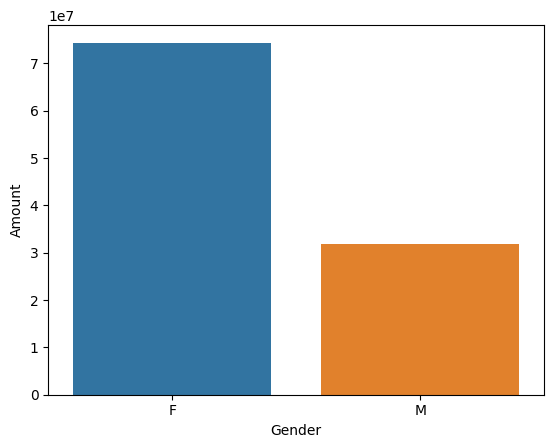

In [11]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

The above graph represents the total number of expenditure genderwise. Turns out that female spends more money then male in online shopping.

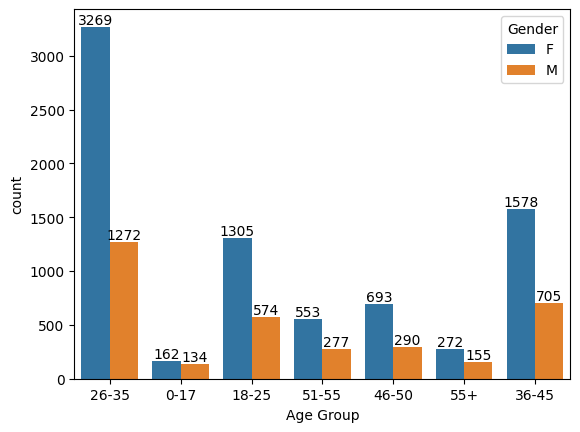

In [12]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

The above graph represents the bifurcation of gender-wise age groups. Where, the age-group of females between 26-35 are more in number of online shopping than any other age-groups.

<Axes: xlabel='State', ylabel='Orders'>

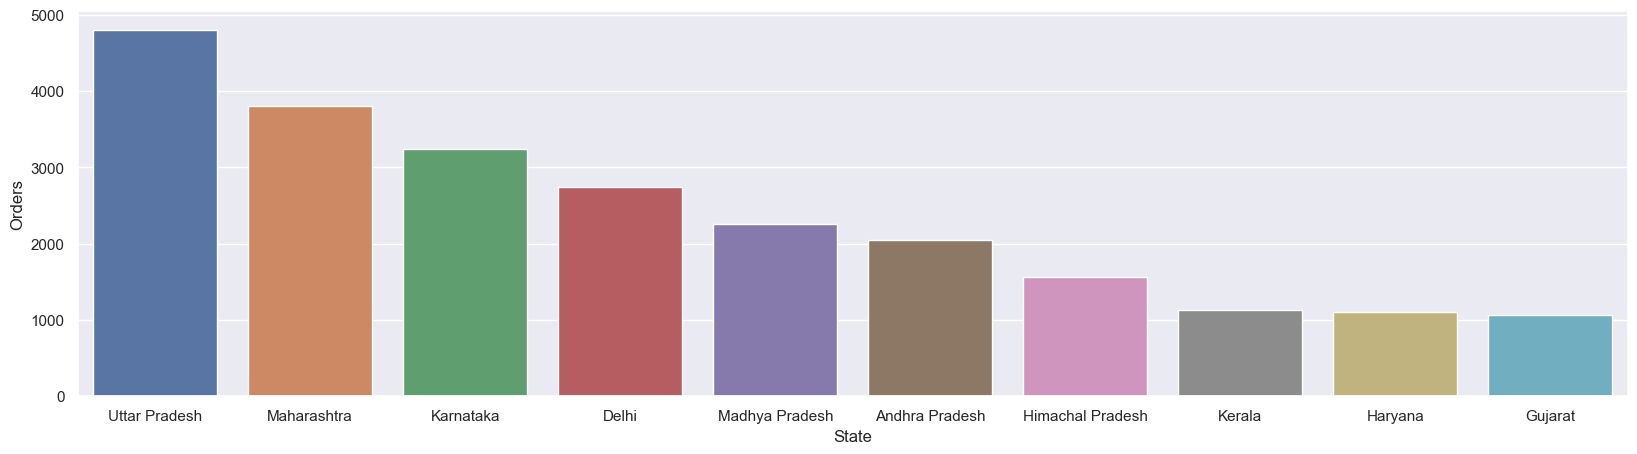

In [13]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders')

The above graph represents the total number of online orders state-wise, where Uttar Pradesh is leading and following Maharashtra is in the second number and Karnataka is in the third number.

<Axes: xlabel='State', ylabel='Amount'>

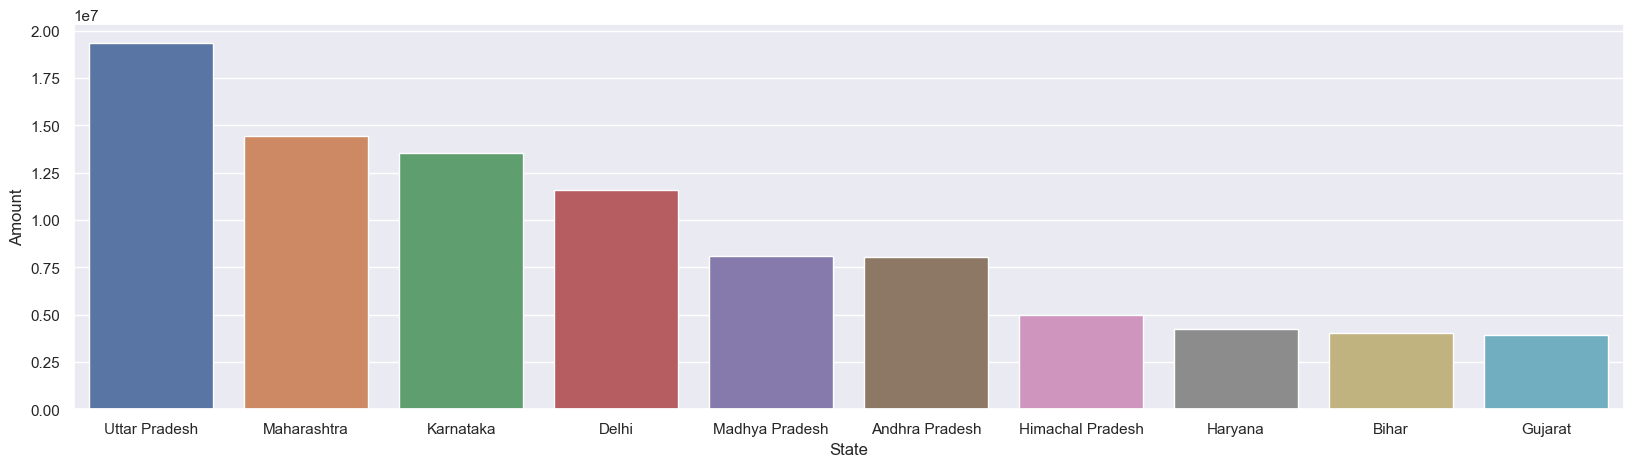

In [14]:

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Amount')

The above graph represents the total number of amount is getting spent on online orders state-wise, where Uttar Pradesh is leading and following Maharashtra in the second number and Karnataka in the third number.

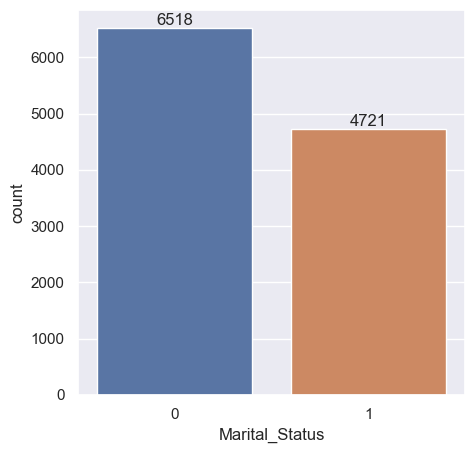

In [21]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(15,5)})
for bars in ax.containers:
    ax.bar_label(bars)

The above graph represents the total number marital status from the orders dataset. Where zero is more in number which means that most of the online shoppers are unmarried.

<Axes: xlabel='Marital_Status', ylabel='Amount'>

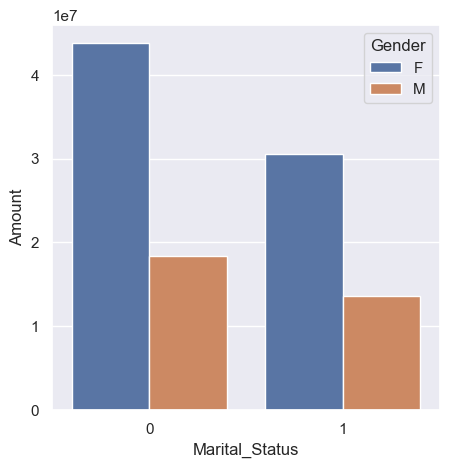

In [16]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

The above graph represents the marital status bifurcation from the orders dataset, where unmarried females are leading in online shopping than married females.

<Axes: xlabel='Occupation', ylabel='Amount'>

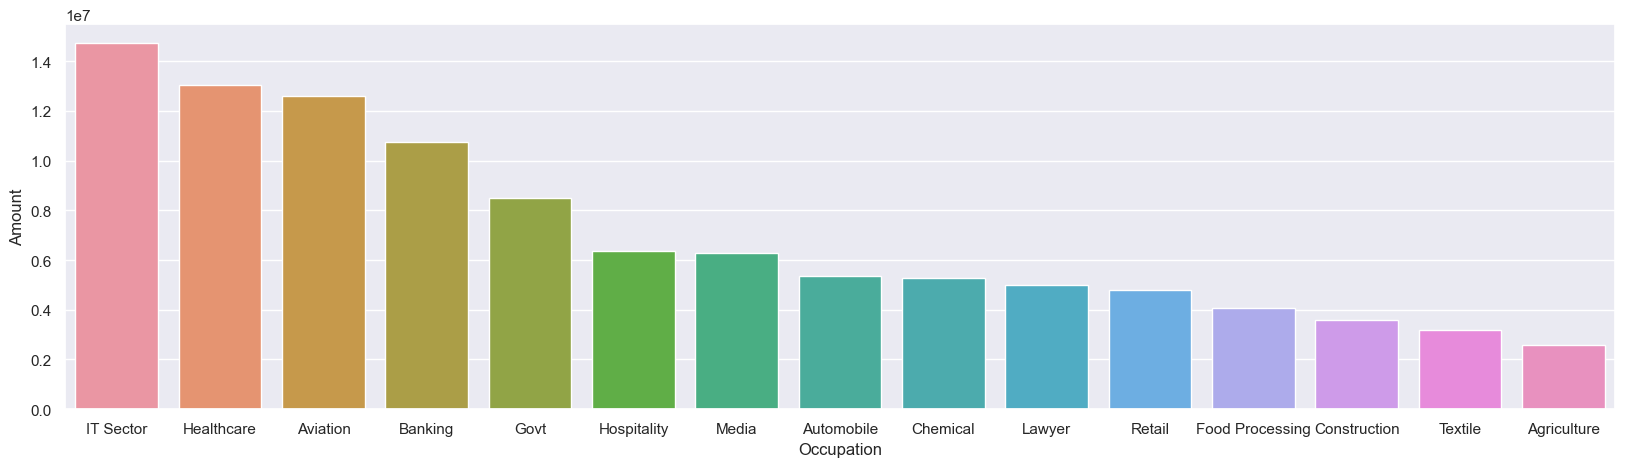

In [17]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation', y = 'Amount')

The above graph represents the different types of occupation of online shoppers, where IT sector is leading.

<Axes: xlabel='Product_Category', ylabel='Amount'>

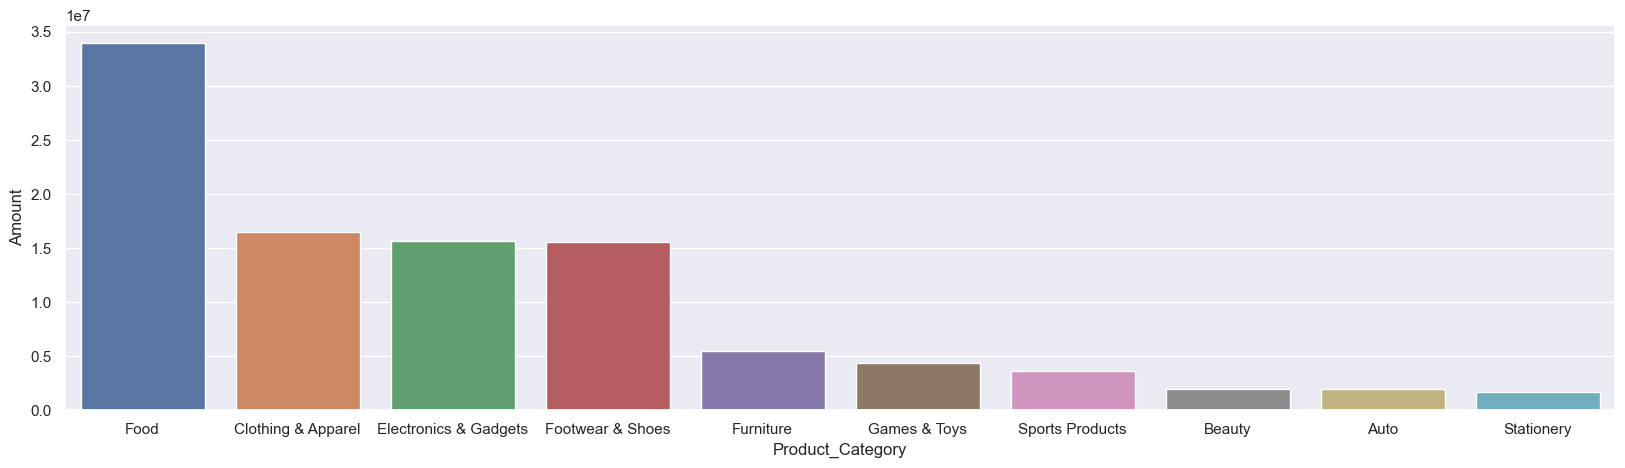

In [18]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category', y = 'Amount')

The above graphs represents the different types of product categories, where the most of the sold products categories are food, clothing and electronics.

<Axes: xlabel='Product_ID', ylabel='Orders'>

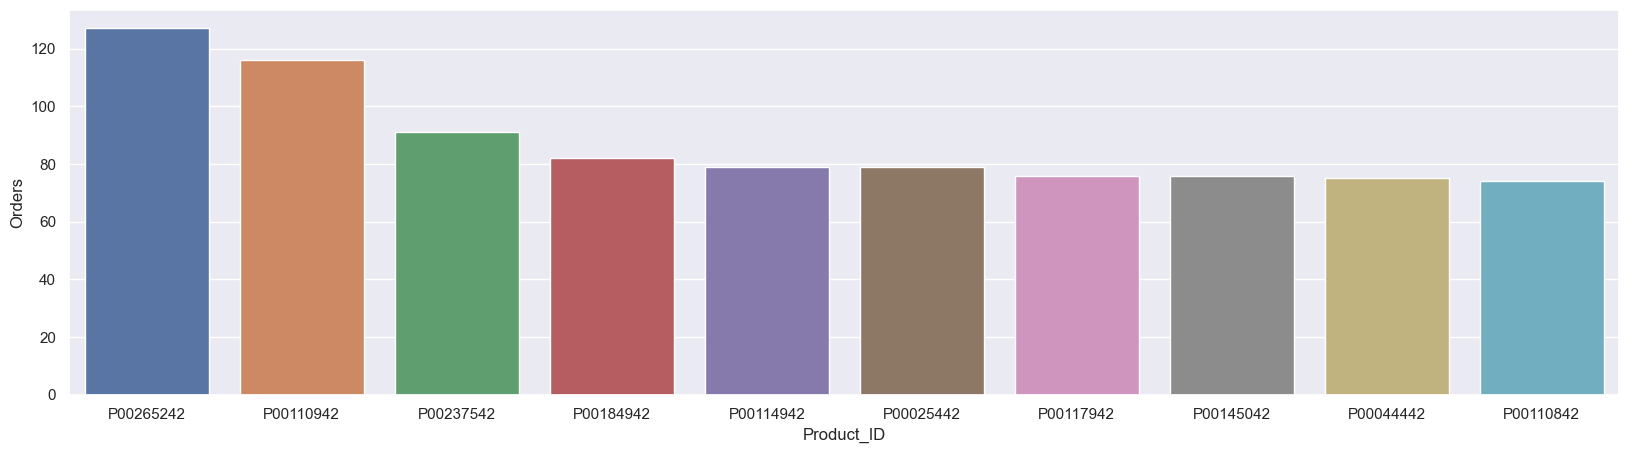

In [19]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID', y = 'Orders')

The above graph represents the different kinds of products in the online shopping, where Product ID P00265242 is the most selling product.

# Conclusion

### *Unmarried women of age group between 26-35 years from the states like Uttar Pradesh, Maharashtra and Karnataka and working in IT sector, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics catogies.*